<a href="https://colab.research.google.com/github/rahiakela/coursera-deep-learning-specialization/blob/course-2-improving-deep-neural-networks/week_1_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

Welcome to the first assignment of the hyper parameters tuning specialization. It is very important that you regularize your model properly because it could dramatically improve your results.

By completing this assignment you will:

- Understand that different initialization methods and their impact on your model performance

- Implement zero initialization and and see it fails to "break symmetry",

- Recognize that random initialization "breaks symmetry" and yields more efficient models,

- Understand that you could use both random initialization and scaling to get even better training performance on your model.

This assignment prepares you well for the upcoming assignment. Take your time to complete it and make sure you get the expected outputs when working through the different exercises.

This is your first assignment of "Improving Deep Neural Networks". 

Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.  

If you completed the previous course of this specialization, you probably followed our instructions for weight initialization, and it has worked out so far. But how do you choose the initialization for a new neural network? In this notebook, you will see how different initializations lead to different results. 

A well chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

To get started, run the following cell to load the packages and the planar dataset you will try to classify.

## Setup

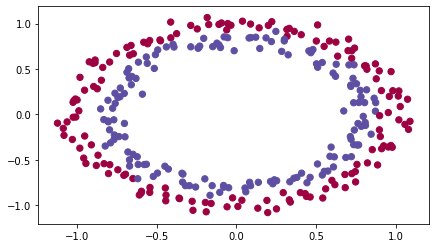

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

You would like a classifier to separate the blue dots from the red dots.

## 1 - Neural Network model 

You will use a 3-layer neural network (already implemented for you). Here are the initialization methods you will experiment with:  
- *Zeros initialization* --  setting `initialization = "zeros"` in the input argument.
- *Random initialization* -- setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization* -- setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: Please quickly read over the code below, and run it. In the next part you will implement the three initialization methods that this `model()` calls.

In [0]:
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization='he'):
  '''
  Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
  Arguments:
  X -- input data, of shape (2, number of examples)
  Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
  learning_rate -- learning rate for gradient descent 
  num_iterations -- number of iterations to run gradient descent
  print_cost -- if True, print the cost every 1000 iterations
  initialization -- flag to choose which initialization to use ("zeros","random" or "he")
  
  Returns:
  parameters -- parameters learnt by the model
  '''

  grads = {}
  costs = []       # to keep track of the loss
  m = X.shape[1]   # number of examples
  layers_dims = [X.shape[0], 10, 5, 1]     

  # Initialize parameters dictionary.
  if initialization == 'zeros':
    parameters = initialize_parameters_zeros(layers_dims)
  if initialization == 'random':
    parameters = initialize_parameters_random(layers_dims)
  if initialization == 'he':
    parameters = initialize_parameters_he(layers_dims)

  # Loop (gradient descent)
  for i in range(0, num_iterations):

    # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    a3, cache = forward_propagation(X, parameters)

    # Loss
    cost = compute_loss(a3, Y)

    # Backward propagation.
    grads = backward_propagation(X, Y, cache)

    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)

    # Print the loss every 1000 iterations
    if print_cost and i % 1000 == 0:
      print(f'Cost after iteration {str(i)}: {str(cost)}')
      costs.append(cost)

  # plot the loss
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title(f'Learning rate = {str(learning_rate)}')
  plt.show()

  return parameters

## 2 - Zero initialization

There are two types of parameters to initialize in a neural network:
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Exercise**: Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry", but lets try it anyway and see what happens. Use np.zeros((..,..)) with the correct shapes.

In [0]:
# FUNCTION: initialize_parameters_zeros 
def initialize_parameters_zeros(layers_dims):
  '''
  Arguments:
  layer_dims -- python array (list) containing the size of each layer.
  
  Returns:
  parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                  W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                  b1 -- bias vector of shape (layers_dims[1], 1)
                  ...
                  WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                  bL -- bias vector of shape (layers_dims[L], 1)
  '''

  parameters = {}
  L = len(layers_dims)            # number of layers in the network

  for layer in range(1, L):
    ### START CODE HERE ### (≈ 2 lines of code)
    parameters['W' + str(layer)] = np.zeros((layers_dims[layer], layers_dims[layer -1]), dtype=np.float32)
    parameters['b' + str(layer)] = np.zeros((layers_dims[layer], 1), dtype=np.float32)
    ### END CODE HERE ###

  return parameters

In [16]:
parameters = initialize_parameters_zeros([3, 2, 1])

print(f'W1 = {str(parameters["W1"])}')
print(f'b1 = {str(parameters["b1"])}')
print(f'W2 = {str(parameters["W2"])}')
print(f'b2 = {str(parameters["b2"])}')

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


**Expected Output**:

<table> 
    <tr>
    <td>
    **W1**
    </td>
        <td>
    [[ 0.  0.  0.]
 [ 0.  0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b1**
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    **W2**
    </td>
        <td>
    [[ 0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    **b2**
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Run the following code to train your model on 15,000 iterations using zeros initialization.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


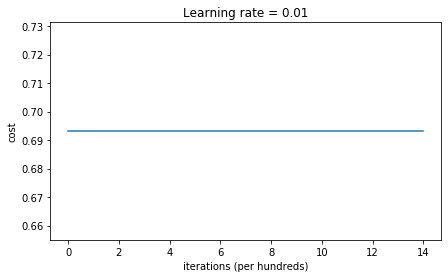

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [17]:
parameters = model(train_X, train_Y, initialization='zeros')
print('On the train set:')
predictions_train = predict(train_X, train_Y, parameters)
print('On the test set:')
predictions_test = predict(test_X, test_Y, parameters)

The performance is really bad, and the cost does not really decrease, and the algorithm performs no better than random guessing. Why? Lets look at the details of the predictions and the decision boundary:

In [18]:
print(f'predictions_train = {str(predictions_train)}')
print(f'predictions_test = {str(predictions_test)}')

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


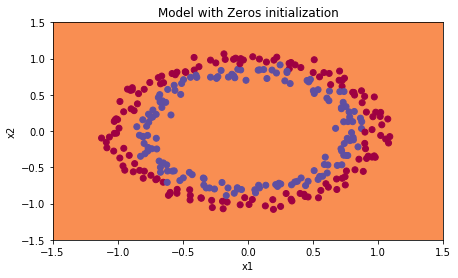

In [20]:
plt.title('Model with Zeros initialization')
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y.ravel())

The model is predicting 0 for every example. 

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, and the network is no more powerful than a linear classifier such as logistic regression. 

<font color='blue'>
**What you should remember**:

- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 


## 3 - Random initialization

To break symmetry, lets intialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs. In this exercise, you will see what happens if the weights are intialized randomly, but to very large values. 

**Exercise**: Implement the following function to initialize your weights to large random values (scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. We are using a fixed `np.random.seed(..)` to make sure your "random" weights  match ours, so don't worry if running several times your code gives you always the same initial values for the parameters. 